In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
poor_dude_data = pd.read_csv('poor_dude.csv')

In [3]:
poor_dude_data

,Unnamed: 0,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,...,lrda_vote,grda_vote,other_vote,total_votes,seizure_vote_prob,lpd_vote_prob,gpd_vote_prob,lrda_vote_prob,grda_vote_prob,other_vote_prob
0,38052,1460778765,0,0.0,747230293,111,2553.0,1709929250,35627,LPD,...,0,0,0,3,0.000000,1.00,0.0,0.000000,0.0,0.000000
1,38053,1460778765,1,6.0,747230293,112,2559.0,1468733703,35627,LPD,...,0,0,0,3,0.000000,1.00,0.0,0.000000,0.0,0.000000
2,38054,1460778765,2,8.0,747230293,113,2561.0,3132645160,35627,LPD,...,0,0,0,3,0.000000,1.00,0.0,0.000000,0.0,0.000000
3,38055,1460778765,3,10.0,747230293,114,2563.0,3821934189,35627,LPD,...,0,0,0,3,0.000000,1.00,0.0,0.000000,0.0,0.000000
4,38056,1460778765,4,12.0,747230293,115,2565.0,3565099887,35627,LPD,...,0,0,0,3,0.000000,1.00,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,38281,1460778765,229,2066.0,747230293,340,4619.0,2539497839,35627,LPD,...,0,0,0,4,0.250000,0.75,0.0,0.000000,0.0,0.000000
230,38282,1460778765,230,2068.0,747230293,341,4621.0,171888920,35627,LPD,...,0,0,0,4,0.250000,0.75,0.0,0.000000,0.0,0.000000
231,38283,1460778765,231,2070.0,747230293,342,4623.0,3126803879,35627,LPD,...,0,0,0,4,0.250000,0.75,0.0,0.000000,0.0,0.000000
232,38284,1460778765,232,2084.0,747230293,343,4637.0,3343611614,35627,Seizure,...,1,0,1,3,0.333333,0.00,0.0,0.333333,0.0,0.333333


In [4]:
eeg_data = pd.read_parquet('train_eegs/1460778765.parquet', engine='fastparquet')

In [5]:
(len(eeg_data)//200)//60

35

In [6]:
spec_data = pd.read_parquet('train_spectrograms/747230293.parquet', engine='fastparquet')

In [7]:
def eeg_plot(data):
    LL_data = pd.DataFrame()
    RL_data = pd.DataFrame()
    LP_data = pd.DataFrame()
    RP_data = pd.DataFrame()
    C_data = pd.DataFrame()

    LL_data['Fp1 - F7'] = data['Fp1'] - data['F7']
    LL_data['F7 - T3'] = data['F7'] - data['T3']
    LL_data['T3 - T5'] = data['T3'] - data['T5']
    LL_data['T5 - O1'] = data['T5'] - data['O1']

    RL_data['Fp2 - F8'] = data['Fp2'] - data['F8']
    RL_data['F8 - T4'] = data['F8'] - data['T4']
    RL_data['T4 - T6'] = data['T4'] - data['T6']
    RL_data['T6 - O2'] = data['T6'] - data['O2']

    LP_data['Fp1 - F3'] = data['Fp1'] - data['F3']
    LP_data['F3 - C3'] = data['F3'] - data['C3']
    LP_data['C3 - P3'] = data['C3'] - data['P3']
    LP_data['P3 - O1'] = data['P3'] - data['O1']

    RP_data['Fp2 - F4'] = data['Fp2'] - data['F4']
    RP_data['F4 - C4'] = data['F4'] - data['C4']
    RP_data['C4 - P4'] = data['C4'] - data['P4']
    RP_data['P4 - O2'] = data['P4'] - data['O2']

    C_data['Fz - Cz'] = data['Fz'] - data['Cz']
    C_data['Cz - Pz'] = data['Cz'] - data['Pz']
    
    fig, axs = plt.subplots(5, figsize=(24,12))
    
    axs[0].plot(LL_data['Fp1 - F7'], label='Fp1 - F7')
    axs[0].plot(LL_data['F7 - T3'], label='F7 - T3')
    axs[0].plot(LL_data['T3 - T5'], label='T3 - T5')
    axs[0].plot(LL_data['T5 - O1'], label='T5 - O1')
    axs[0].legend(loc='upper right')
    axs[0].set_title('LL')

    axs[1].plot(RL_data['Fp2 - F8'], label='Fp2 - F8')
    axs[1].plot(RL_data['F8 - T4'], label='F8 - T4')
    axs[1].plot(RL_data['T4 - T6'], label='T4 - T6')
    axs[1].plot(RL_data['T6 - O2'], label='T6 - O2')
    axs[1].legend(loc='upper right')
    axs[1].set_title('RL')

    axs[2].plot(LP_data['Fp1 - F3'], label='Fp1 - F3')
    axs[2].plot(LP_data['F3 - C3'], label='F3 - C3')
    axs[2].plot(LP_data['C3 - P3'], label='C3 - P3')
    axs[2].plot(LP_data['P3 - O1'], label='P3 - O1')
    axs[2].legend(loc='upper right')
    axs[2].set_title('LP')

    axs[3].plot(RP_data['Fp2 - F4'], label='Fp2 - F4')
    axs[3].plot(RP_data['F4 - C4'], label='F4 - C4')
    axs[3].plot(RP_data['C4 - P4'], label='C4 - P4')
    axs[3].plot(RP_data['P4 - O2'], label='P4 - O2')
    axs[3].legend(loc='upper right')
    axs[3].set_title('RP')

    axs[4].plot(C_data['Fz - Cz'], label='Fz - Cz')
    axs[4].plot(C_data['Cz - Pz'], label='Cz - Pz')
    axs[4].legend(loc='upper right')
    axs[4].set_title('C')    
    
    plt.tight_layout()
    plt.show()

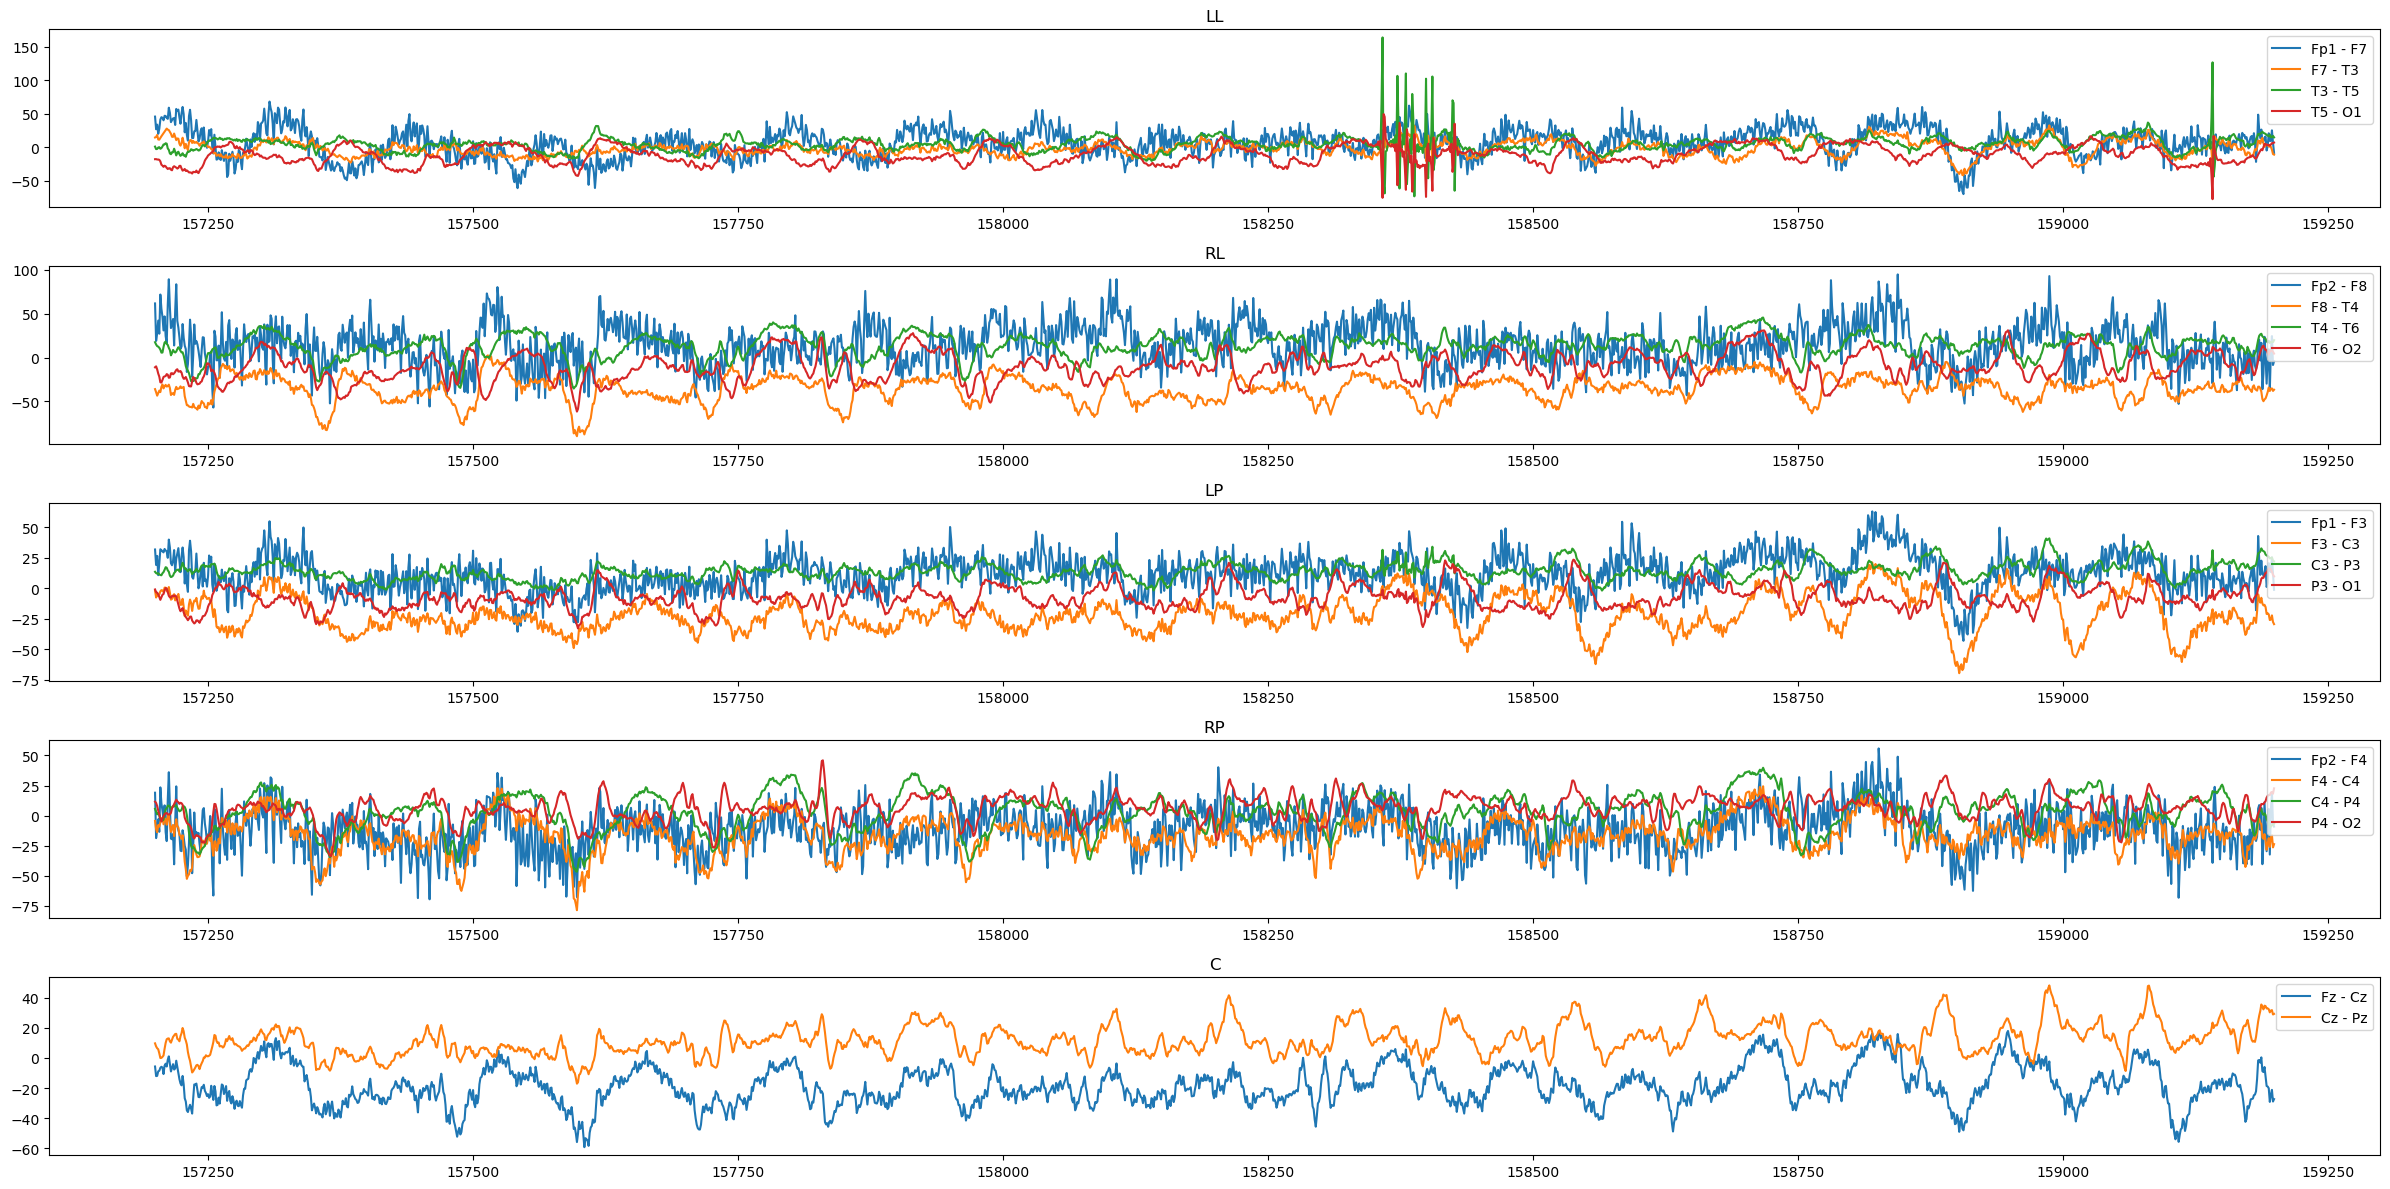

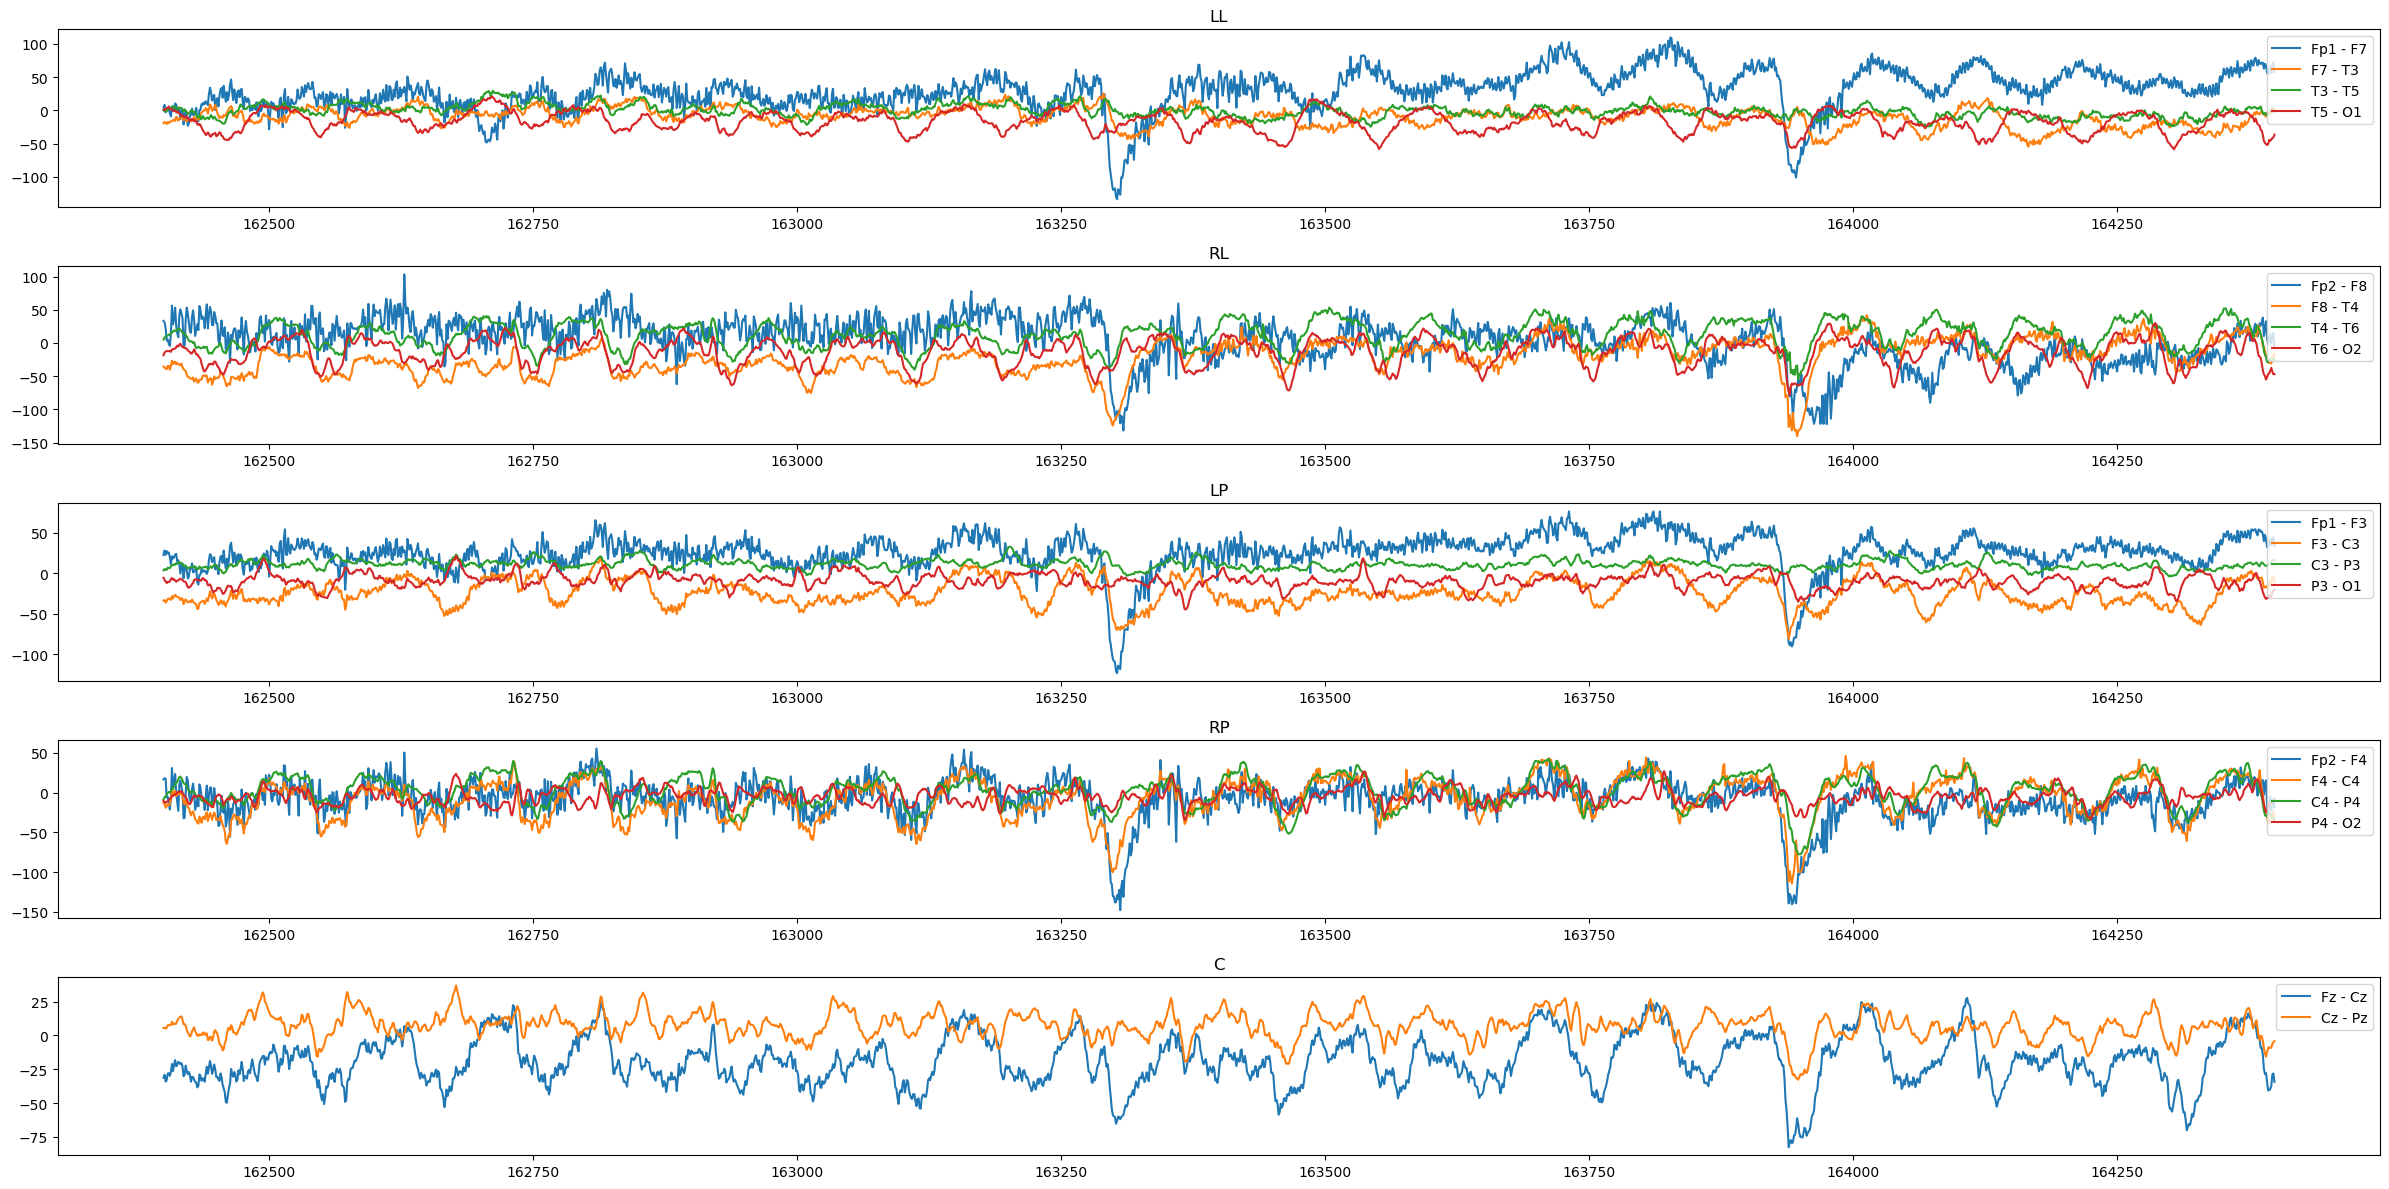

In [8]:
for offset in [766, 792]:
    mid = offset * 200 + 5000
    data = eeg_data.iloc[mid - 1000 : mid + 1000]

    eeg_plot(data)


         


In [9]:
poor_dude_data.head(10)

,Unnamed: 0,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,...,lrda_vote,grda_vote,other_vote,total_votes,seizure_vote_prob,lpd_vote_prob,gpd_vote_prob,lrda_vote_prob,grda_vote_prob,other_vote_prob
0,38052,1460778765,0,0.0,747230293,111,2553.0,1709929250,35627,LPD,...,0,0,0,3,0.00,1.00,0.0,0.0,0.0,0.0
1,38053,1460778765,1,6.0,747230293,112,2559.0,1468733703,35627,LPD,...,0,0,0,3,0.00,1.00,0.0,0.0,0.0,0.0
2,38054,1460778765,2,8.0,747230293,113,2561.0,3132645160,35627,LPD,...,0,0,0,3,0.00,1.00,0.0,0.0,0.0,0.0
3,38055,1460778765,3,10.0,747230293,114,2563.0,3821934189,35627,LPD,...,0,0,0,3,0.00,1.00,0.0,0.0,0.0,0.0
4,38056,1460778765,4,12.0,747230293,115,2565.0,3565099887,35627,LPD,...,0,0,0,3,0.00,1.00,0.0,0.0,0.0,0.0
5,38057,1460778765,5,16.0,747230293,116,2569.0,748495805,35627,LPD,...,0,0,0,3,0.00,1.00,0.0,0.0,0.0,0.0
6,38058,1460778765,6,18.0,747230293,117,2571.0,4067413172,35627,LPD,...,0,0,0,3,0.00,1.00,0.0,0.0,0.0,0.0
7,38059,1460778765,7,20.0,747230293,118,2573.0,3389779540,35627,LPD,...,0,0,0,3,0.00,1.00,0.0,0.0,0.0,0.0
8,38060,1460778765,8,26.0,747230293,119,2579.0,3136418213,35627,LPD,...,0,0,0,4,0.25,0.75,0.0,0.0,0.0,0.0
9,38061,1460778765,9,28.0,747230293,120,2581.0,2858433648,35627,LPD,...,0,0,0,4,0.25,0.75,0.0,0.0,0.0,0.0


In [14]:
poor_dude_data['expert_consensus'].agg('mode')

0    LPD
Name: expert_consensus, dtype: object